In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [5]:
data = data.dropna()
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,18590.0,2.179398,1.133148,0.0,1.00,2.00,3.00,5.0
Resource Allocation,18590.0,4.486552,2.044848,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,18590.0,5.732173,1.920547,0.0,4.60,5.90,7.10,10.0
Burn Rate,18590.0,0.452444,0.197848,0.0,0.32,0.45,0.59,1.0


In [7]:
data=data.drop('Employee ID',axis=1)


In [8]:
data

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
...,...,...,...,...,...,...,...,...
22743,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48
22744,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22748,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [9]:
data['Gender'].value_counts()


Female    9747
Male      8843
Name: Gender, dtype: int64

In [10]:
data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,1,Service,No,2.0,3.0,3.8,0.16
1,2008-11-30,0,Service,Yes,1.0,2.0,5.0,0.36
3,2008-11-03,0,Service,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,1,Service,No,3.0,7.0,6.9,0.52
5,2008-11-26,0,Product,Yes,2.0,4.0,3.6,0.29


In [11]:
data['Company Type'].value_counts()


Service    12174
Product     6416
Name: Company Type, dtype: int64

In [12]:
data.replace({'Company Type':{'Service':0,'Product':1}},inplace=True)
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,1,0,No,2.0,3.0,3.8,0.16
1,2008-11-30,0,0,Yes,1.0,2.0,5.0,0.36
3,2008-11-03,0,0,Yes,1.0,1.0,2.6,0.20
4,2008-07-24,1,0,No,3.0,7.0,6.9,0.52
5,2008-11-26,0,1,Yes,2.0,4.0,3.6,0.29


In [13]:
data['WFH Setup Available'].value_counts()

Yes    10030
No      8560
Name: WFH Setup Available, dtype: int64

In [14]:
data.replace({'WFH Setup Available':{'No':0,'Yes':1}},inplace=True)
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,1,0,0,2.0,3.0,3.8,0.16
1,2008-11-30,0,0,1,1.0,2.0,5.0,0.36
3,2008-11-03,0,0,1,1.0,1.0,2.6,0.20
4,2008-07-24,1,0,0,3.0,7.0,6.9,0.52
5,2008-11-26,0,1,1,2.0,4.0,3.6,0.29


In [15]:
data['NumericDate'] = data['Date of Joining']
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,NumericDate
0,2008-09-30,1,0,0,2.0,3.0,3.8,0.16,2008-09-30
1,2008-11-30,0,0,1,1.0,2.0,5.0,0.36,2008-11-30
3,2008-11-03,0,0,1,1.0,1.0,2.6,0.20,2008-11-03
4,2008-07-24,1,0,0,3.0,7.0,6.9,0.52,2008-07-24
5,2008-11-26,0,1,1,2.0,4.0,3.6,0.29,2008-11-26


In [16]:
data['NumericDate'] = pd.to_datetime(data['NumericDate'])

data['NumericDate'] = data['NumericDate'].dt.strftime('%Y%m%d')


In [17]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,NumericDate
0,2008-09-30,1,0,0,2.0,3.0,3.8,0.16,20080930
1,2008-11-30,0,0,1,1.0,2.0,5.0,0.36,20081130
3,2008-11-03,0,0,1,1.0,1.0,2.6,0.20,20081103
4,2008-07-24,1,0,0,3.0,7.0,6.9,0.52,20080724
5,2008-11-26,0,1,1,2.0,4.0,3.6,0.29,20081126


In [18]:
data=data.drop('Date of Joining',axis=1)


In [19]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,NumericDate
0,1,0,0,2.0,3.0,3.8,0.16,20080930
1,0,0,1,1.0,2.0,5.0,0.36,20081130
3,0,0,1,1.0,1.0,2.6,0.20,20081103
4,1,0,0,3.0,7.0,6.9,0.52,20080724
5,0,1,1,2.0,4.0,3.6,0.29,20081126


In [35]:
print(type(data['NumericDate'][0]))

<class 'str'>


In [37]:
data['NumericDate']=data['NumericDate'].astype(int)

In [38]:
print(type(data['NumericDate'][0]))

<class 'numpy.int64'>


<Axes: >

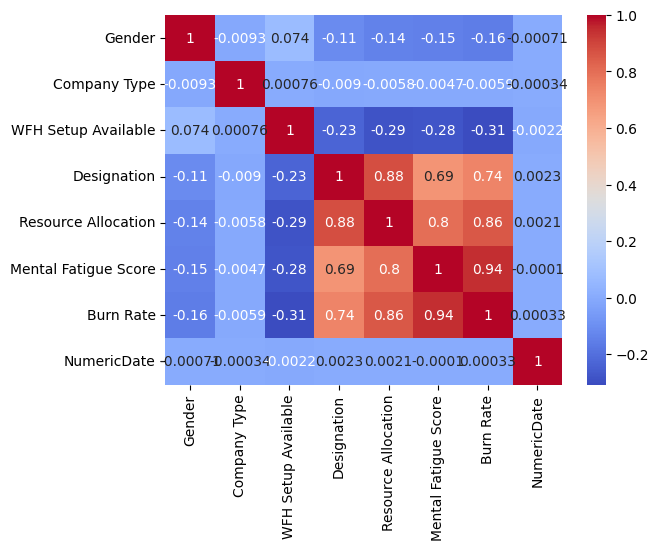

In [39]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [40]:
data=data.drop('NumericDate',axis=1)


In [41]:
ndata=data

In [42]:
y = ndata['Burn Rate']


In [43]:
tdata=ndata.drop('Burn Rate',axis=1)


In [44]:
x=tdata

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.8,shuffle=True,random_state=1)

In [46]:
X_train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
3277,1,1,0,2.0,3.0,4.0
7308,0,0,0,1.0,2.0,3.1
1560,0,0,1,1.0,2.0,4.9
20777,0,0,1,1.0,3.0,6.1
6567,0,0,0,1.0,3.0,3.6
...,...,...,...,...,...,...
13453,1,1,1,3.0,7.0,8.9
21179,0,0,1,3.0,5.0,3.7
6327,0,0,0,3.0,5.0,5.9
14933,0,0,0,2.0,5.0,7.1


In [47]:
Y_test

14239    0.38
15056    0.21
12187    0.65
248      0.40
12710    0.31
         ... 
6184     0.41
10128    0.51
21485    0.49
20780    0.00
16416    0.17
Name: Burn Rate, Length: 3718, dtype: float64

In [48]:
# scaler = StandardScaler()
# scaler.fit(x_train)

In [49]:
# x_train = pd.DataFrame(scaler.transform(x_train))
# x_text = pd.DataFrame(scaler.transform(x_test))


In [50]:
# x_train

In [51]:
model = GradientBoostingRegressor()

In [52]:
model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [53]:
print(model.score(X_test,Y_test))

0.9257340219653589
